## Project 1 - Finding Lane Lines

**Below is the code to create a pipeline for applying the tools like Grayscale, Gaussian Blur, Canny Edge Detection, Region of Interrest, and Hough Transform to test images to detect the lane lines. Once the pipeline is well-defined and tested on the test images, the pipeline is then tested on videos to detect the lane lines.**

In [1]:
# -----------------------#
#   Importing Packages   #
# -----------------------#
import matplotlib.pyplot as plt
# To allow plotting images more than maximum without getting error
plt.rcParams.update({'figure.max_open_warning': 0})
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline
import math
import os

# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML
import imageio
#imageio.plugins.ffmpeg.download()

In [2]:
# ---------------------#
#   Tools Definition   #
# ---------------------#
"""Applies the Grayscale transform"""
def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

"""Applies a Gaussian Noise Blur"""
def gaussian_blur(img, kernel_size):
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

"""Applies the Canny transform"""
def canny(img, low_threshold, high_threshold):
    return cv2.Canny(img, low_threshold, high_threshold)

"""Applies region of interest"""
def region_of_interest(img, vertices):
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

"""Draws lines with `color` and `thickness`"""
def draw_lines(img, lines, color=[255, 0, 0], thickness=10):
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(img, (x1, y1), (x2, y2), color, thickness)

"""Applies Hough rough lines"""
def hough_rawlines(img, rho, theta, threshold, min_line_len, max_line_gap):
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    draw_lines(line_img, lines)
    return line_img

"""Applies Hough solid lines"""
def hough_solidlines(img, rho, theta, threshold, min_line_len, max_line_gap):
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    lane_lines(line_img, lines)
    return line_img

"""Applies weighted image"""
def weighted_img(img, initial_img, α=0.8, β=1., γ=0.):
    return cv2.addWeighted(initial_img, α, img, β, γ)

"""Draws left and right lane lines"""
def lane_lines(img, lines):
    right_slopes = []
    right_intercepts = []
    left_slopes = []
    left_intercepts = []
    left_points_x = []
    left_points_y = []
    right_points_x = []
    right_points_y = []
    
    bottom_y = int(img.shape[0])
    top_y = int(bottom_y * 0.6)
    
    for line in lines:
        for x1,y1,x2,y2 in line:
            m = (y2-y1)/(x2-x1)
            # Left lane
            if m < -0.4 and m > -math.inf:
                left_slopes.append(m)
                left_points_x.append(x1)
                left_points_x.append(x2)
                left_points_y.append(y1)
                left_points_y.append(y2)
                left_intercepts.append(y1 - m*x1)
            # Right lane
            if m > 0.4 and m < math.inf:
                right_slopes.append(m)
                right_points_x.append(x1)
                right_points_x.append(x2)
                right_points_y.append(y1)
                right_points_y.append(y2)
                right_intercepts.append(y1 - m*x1)
            
    if len(left_slopes) > 0:
        left_slope = np.mean(left_slopes)
        left_intercept = np.mean(left_intercepts)
        top_x_left = int((top_y - left_intercept)/left_slope) 
        bottom_x_left = int((bottom_y - left_intercept)/left_slope)
        cv2.line(img, (top_x_left, top_y), (bottom_x_left, bottom_y), [255, 0, 0], 15)
    
    if len(right_slopes) > 0:
        right_slope = np.mean(right_slopes)
        right_intercept = np.mean(right_intercepts)
        top_x_right = int((top_y - right_intercept)/right_slope) 
        bottom_x_right = int((bottom_y - right_intercept)/right_slope)
        cv2.line(img, (top_x_right, top_y), (bottom_x_right, bottom_y), [255, 0, 0], 15)

In [3]:
# -----------------------------#
#   Parameters for the Tools   #
# -----------------------------#
"""Kernel size for Gaussian Noise Blur"""
kernel_size = 5

"""Thresholds for Canny Edge Detection"""
low_threshold = 50
high_threshold = 150

"""Hough transform"""
rho = 2
theta = np.pi/180    # 1 degree
threshold = 20
min_line_len = 50
max_line_gap = 25

"""Weighted image"""
α=0.8
β=1.
γ=0.

## Pipeline to draw lane lines on the test_images

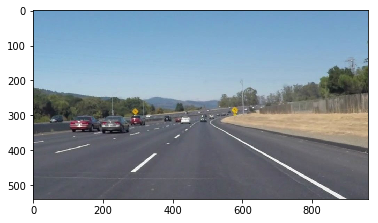

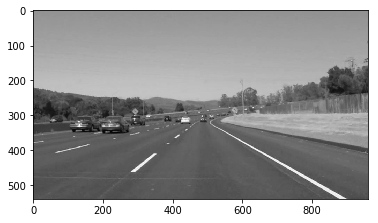

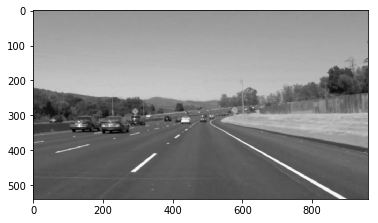

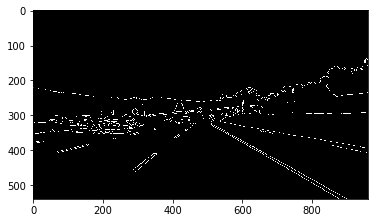

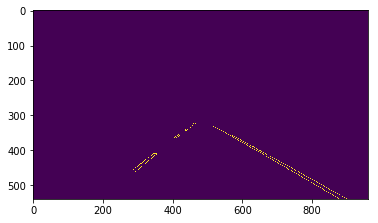

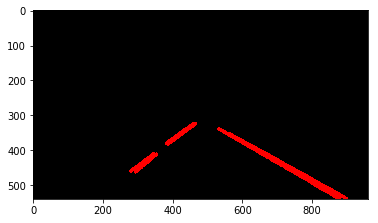

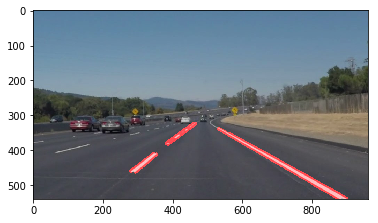

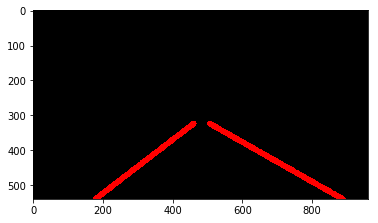

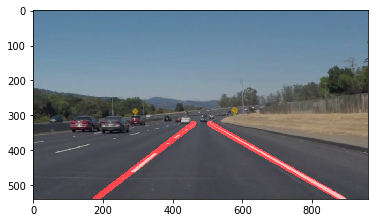

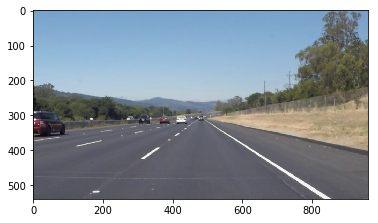

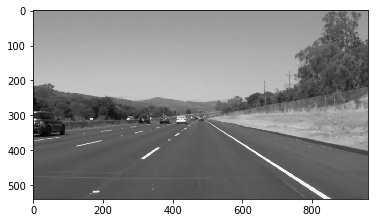

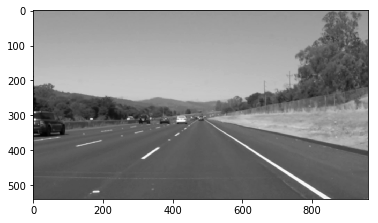

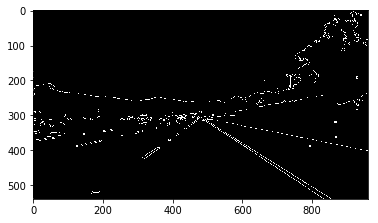

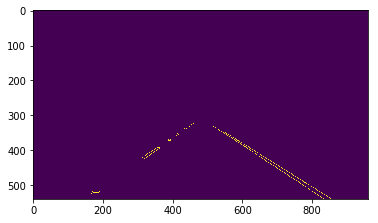

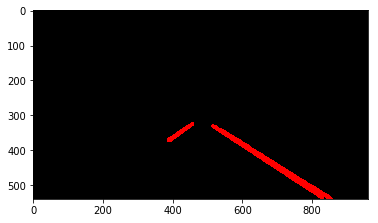

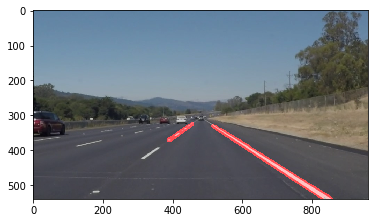

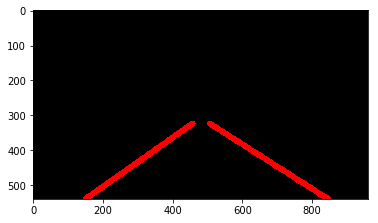

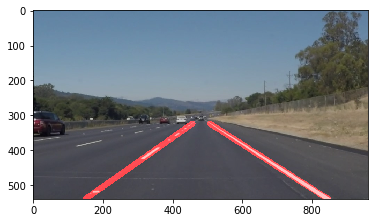

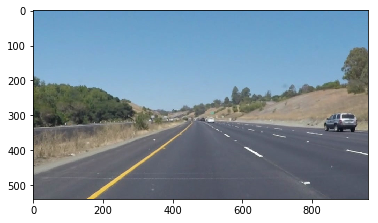

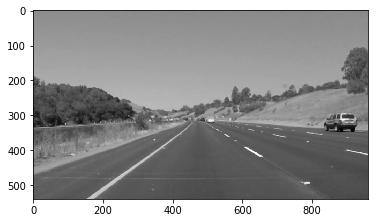

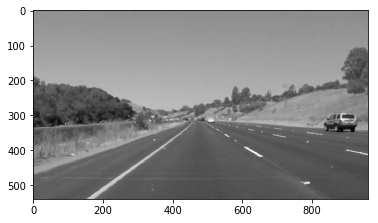

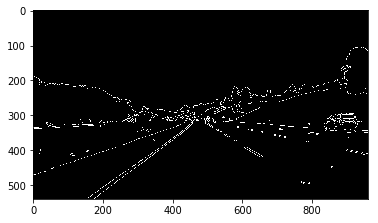

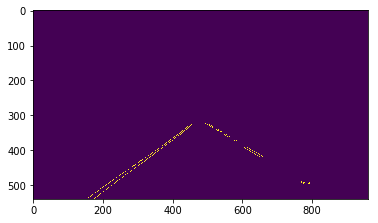

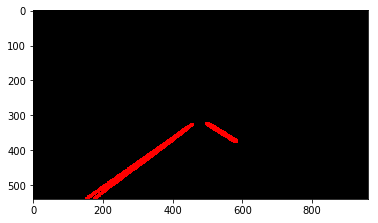

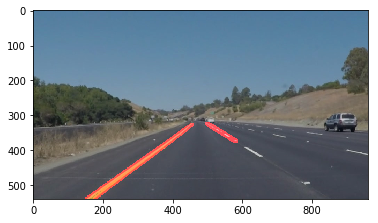

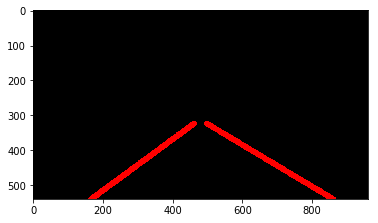

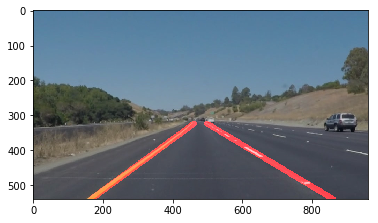

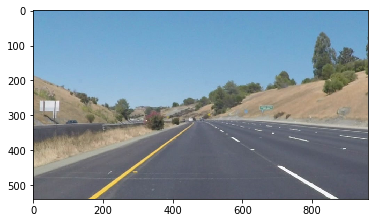

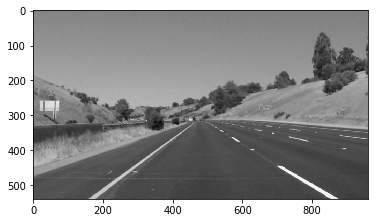

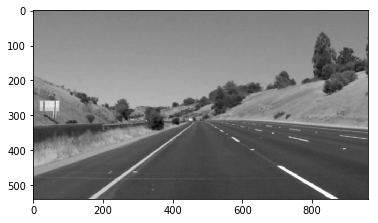

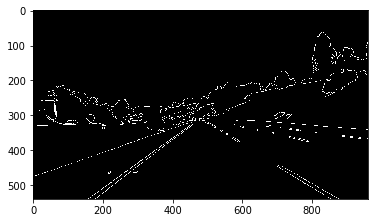

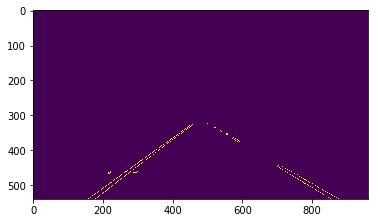

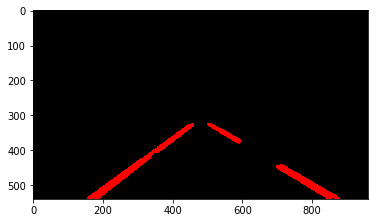

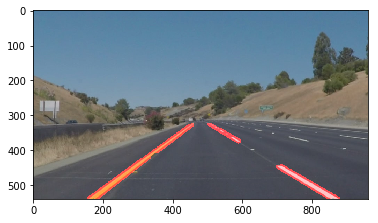

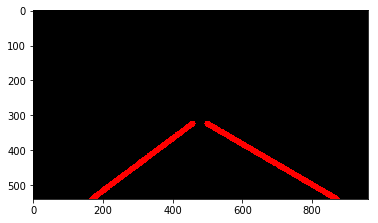

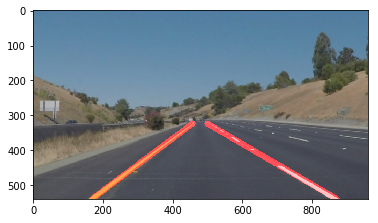

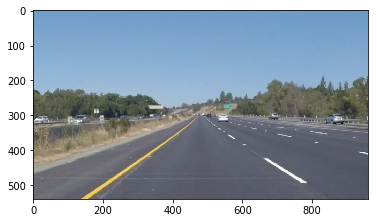

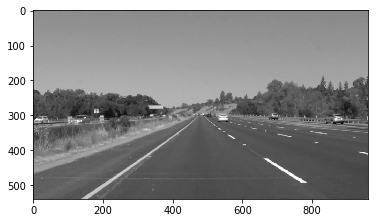

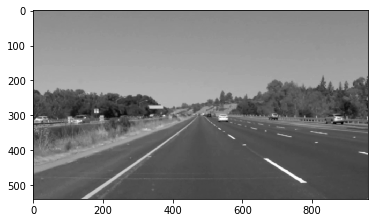

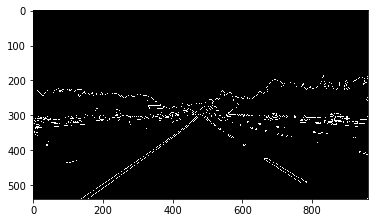

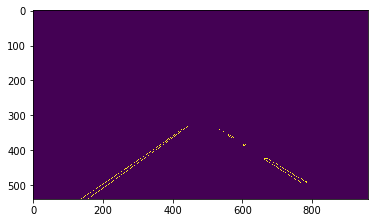

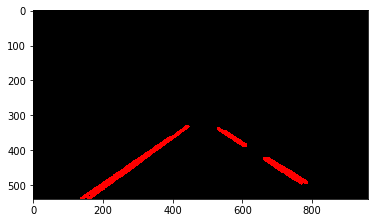

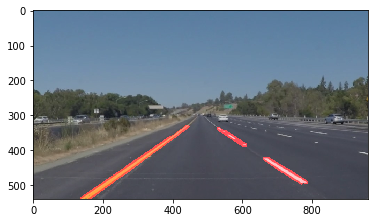

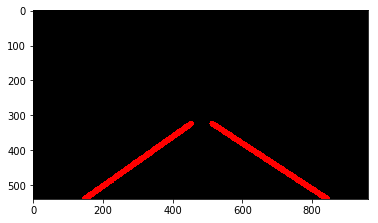

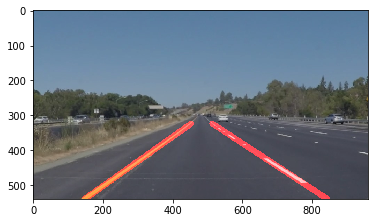

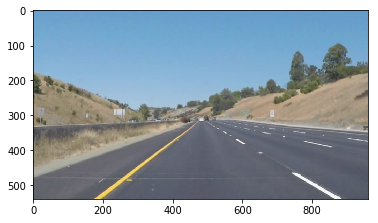

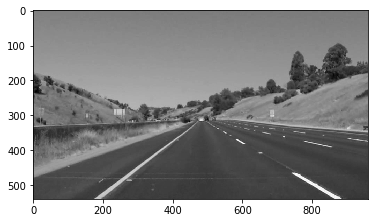

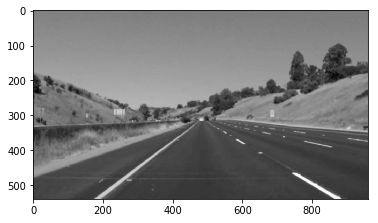

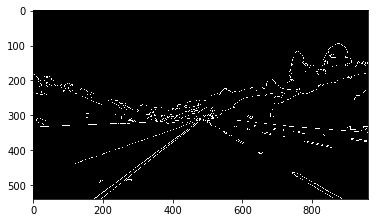

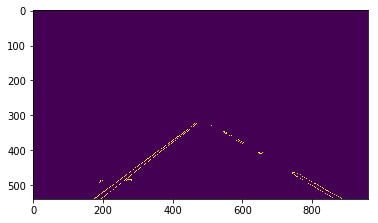

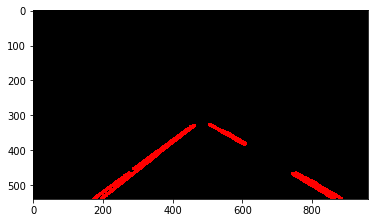

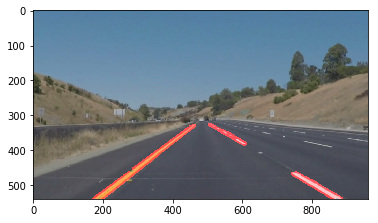

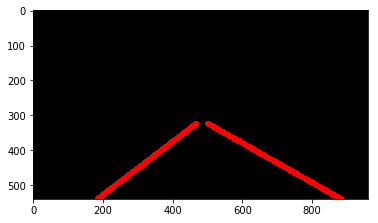

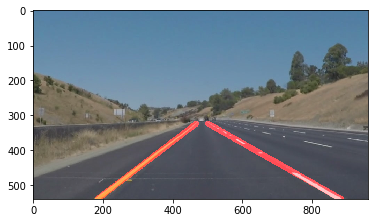

In [4]:
imageList = os.listdir("test_images/")
for imagefile in imageList:
# ---------------------#
#   Load Test Images   #
# ---------------------#
    image = mpimg.imread('test_images/' + imagefile)
    plt.figure()
    plt.imshow(image)

# --------------------#
#   Apply Grayscale   #
# --------------------#
    gray = grayscale(image)
    plt.figure()
    plt.imshow(gray, cmap='gray')
    if not os.path.exists('1_test_images_Gray'):
        os.makedirs('1_test_images_Gray')
    cv2.imwrite('1_test_images_Gray/' + imagefile, gray)
    
# ------------------------#
#   Apply Gaussian Blur   #
# ------------------------#
    blur = gaussian_blur(gray, kernel_size)
    plt.figure()
    plt.imshow(blur, cmap='gray')
    if not os.path.exists('2_test_images_Blur'):
        os.makedirs('2_test_images_Blur')
    cv2.imwrite('2_test_images_Blur/' + imagefile, blur)
    
# -------------------------------#
#   Apply Canny Edge Detection   #
# -------------------------------#
    edges = canny(blur, low_threshold, high_threshold)
    plt.figure()
    plt.imshow(edges, cmap = 'gray')
    if not os.path.exists('3_test_images_Canny'):
        os.makedirs('3_test_images_Canny')
    cv2.imwrite('3_test_images_Canny/' + imagefile, edges)

# -----------------------------#
#   Apply Region of Interest   #
# -----------------------------#
    ysize = image.shape[0]
    xsize = image.shape[1]
    
    # Coordinates for a four-sided polygon
    bottom_left = [xsize*0, ysize*1]
    top_left = [xsize*0.48, ysize*0.6]
    top_right = [xsize*0.52, ysize*0.6]
    bottom_right = [xsize*1, ysize*1]
    vertices = np.array([bottom_left, top_left, top_right, bottom_right], np.int32)

    masked_edges = region_of_interest(edges, [vertices])
    plt.figure()
    plt.imshow(masked_edges)
    if not os.path.exists('4_test_images_MaskedROI'):
        os.makedirs('4_test_images_MaskedROI')
    cv2.imwrite('4_test_images_MaskedROI/' + imagefile, masked_edges)
    
# ----------------------------------------#
#   Apply Hough Transform with raw lines  #
# ----------------------------------------#
    hough_raw = hough_rawlines(masked_edges, rho, theta, threshold, min_line_len, max_line_gap)
    plt.figure()
    plt.imshow(hough_raw)
    if not os.path.exists('5_test_images_HoughRaw'):
        os.makedirs('5_test_images_HoughRaw')
    cv2.imwrite('5_test_images_HoughRaw/' + imagefile, hough_raw)
    
# ----------------------------------#
#   Weighted image with raw lines   #
# ----------------------------------#
    merge = weighted_img(hough_raw, image, α, β, γ)
    plt.figure()
    plt.imshow(merge)
    if not os.path.exists('6_test_images_MergeRaw'):
        os.makedirs('6_test_images_MergeRaw')
    cv2.imwrite('6_test_images_MergeRaw/' + imagefile, merge)

# ------------------------------------------#
#   Apply Hough Transform with solid lines  #
# ------------------------------------------#
    hough_solid = hough_solidlines(masked_edges, rho, theta, threshold, min_line_len, max_line_gap)
    plt.figure()
    plt.imshow(hough_solid)
    if not os.path.exists('7_test_images_HoughSolid'):
        os.makedirs('7_test_images_HoughSolid')
    cv2.imwrite('7_test_images_HoughSolid/' + imagefile, hough_solid)
    
# ------------------------------------#
#   Weighted image with solid lines   #
# ------------------------------------#
    merge = weighted_img(hough_solid, image, α, β, γ)
    plt.figure()
    plt.imshow(merge)
    if not os.path.exists('test_images_output'):
        os.makedirs('test_images_output')
    cv2.imwrite('test_images_output/' + imagefile, merge)

## Pipeline to draw lane lines on the test_videos

In [5]:
def process_image_raw(image):
    gray = grayscale(image)
    blur = gaussian_blur(gray, kernel_size)
    edges = canny(blur, low_threshold, high_threshold)
    ysize = image.shape[0]
    xsize = image.shape[1]
    vertices = np.array([[0, ysize],[xsize/2,(ysize/2)+45],[xsize,ysize]], np.int32)
    masked_edges = region_of_interest(edges, [vertices])
    hough_raw = hough_rawlines(masked_edges, rho, theta, threshold, min_line_len, max_line_gap)
    merge = weighted_img(hough_raw, image, α, β, γ)
    result = merge
    return result

def process_image_solid(image):
    gray = grayscale(image)
    blur = gaussian_blur(gray, kernel_size)
    edges = canny(blur, low_threshold, high_threshold)
    ysize = image.shape[0]
    xsize = image.shape[1]
    vertices = np.array([[0, ysize],[xsize/2,(ysize/2)+45],[xsize,ysize]], np.int32)
    masked_edges = region_of_interest(edges, [vertices])
    hough_solid = hough_solidlines(masked_edges, rho, theta, threshold, min_line_len, max_line_gap)
    merge = weighted_img(hough_solid, image, α, β, γ)
    result = merge
    return result

### Let's try the one with the solid white lane on the right first ... Drawing Raw Lines

In [6]:
if not os.path.exists('test_videos_output/raw'):
        os.makedirs('test_videos_output/raw')
white_output_raw = 'test_videos_output/raw/solidWhiteRight.mp4'
clip1_raw = VideoFileClip("test_videos/solidWhiteRight.mp4")
white_clip = clip1_raw.fl_image(process_image_raw)
%time white_clip.write_videofile(white_output_raw, audio=False)

[MoviePy] >>>> Building video test_videos_output/raw/solidWhiteRight.mp4
[MoviePy] Writing video test_videos_output/raw/solidWhiteRight.mp4


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 221/222 [00:03<00:00, 59.74it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/raw/solidWhiteRight.mp4 

Wall time: 4.3 s


In [7]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output_raw))

### Solid white lane on the right first ... Drawing Solid Lines

In [8]:
if not os.path.exists('test_videos_output/solid'):
        os.makedirs('test_videos_output/solid')
white_output_solid = 'test_videos_output/solid/solidWhiteRight.mp4'
clip1_solid = VideoFileClip("test_videos/solidWhiteRight.mp4")
white_clip = clip1_solid.fl_image(process_image_solid)
%time white_clip.write_videofile(white_output_solid, audio=False)

[MoviePy] >>>> Building video test_videos_output/solid/solidWhiteRight.mp4
[MoviePy] Writing video test_videos_output/solid/solidWhiteRight.mp4


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 221/222 [00:03<00:00, 56.85it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/solid/solidWhiteRight.mp4 

Wall time: 4.44 s


In [9]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output_solid))

### Now for the one with the solid yellow lane on the left ... Drawing Raw Lines

In [10]:
if not os.path.exists('test_videos_output/raw'):
        os.makedirs('test_videos_output/raw')
yellow_output_raw = 'test_videos_output/raw/solidYellowLeft.mp4'
clip2_raw = VideoFileClip('test_videos/solidYellowLeft.mp4')
yellow_clip = clip2_raw.fl_image(process_image_raw)
%time yellow_clip.write_videofile(yellow_output_raw, audio=False)

[MoviePy] >>>> Building video test_videos_output/raw/solidYellowLeft.mp4
[MoviePy] Writing video test_videos_output/raw/solidYellowLeft.mp4


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 681/682 [00:11<00:00, 60.41it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/raw/solidYellowLeft.mp4 

Wall time: 11.8 s


In [11]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(yellow_output_raw))

### Solid yellow lane on the left ... Drawing Solid Lines

In [12]:
if not os.path.exists('test_videos_output/solid'):
        os.makedirs('test_videos_output/solid')
yellow_output_solid = 'test_videos_output/solid/solidYellowLeft.mp4'
clip2_solid = VideoFileClip('test_videos/solidYellowLeft.mp4')
yellow_clip = clip2_solid.fl_image(process_image_solid)
%time yellow_clip.write_videofile(yellow_output_solid, audio=False)

[MoviePy] >>>> Building video test_videos_output/solid/solidYellowLeft.mp4
[MoviePy] Writing video test_videos_output/solid/solidYellowLeft.mp4


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 681/682 [00:10<00:00, 62.88it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/solid/solidYellowLeft.mp4 

Wall time: 11.4 s


In [13]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(yellow_output_solid))

### Optional Challenge ... Drawing Raw Lines

In [14]:
if not os.path.exists('test_videos_output/raw'):
        os.makedirs('test_videos_output/raw')
challenge_output_raw = 'test_videos_output/raw/challenge.mp4'
clip3_raw = VideoFileClip('test_videos/challenge.mp4')
challenge_clip = clip3_raw.fl_image(process_image_raw)
%time challenge_clip.write_videofile(challenge_output_raw, audio=False)

[MoviePy] >>>> Building video test_videos_output/raw/challenge.mp4
[MoviePy] Writing video test_videos_output/raw/challenge.mp4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 251/251 [00:08<00:00, 26.36it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/raw/challenge.mp4 

Wall time: 10.2 s


In [15]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(challenge_output_raw))

### Optional Challenge ... Drawing Solid Lines

In [16]:
if not os.path.exists('test_videos_output/solid'):
        os.makedirs('test_videos_output/solid')
challenge_output_solid = 'test_videos_output/solid/challenge.mp4'
clip3_solid = VideoFileClip('test_videos/challenge.mp4')
challenge_clip = clip3_solid.fl_image(process_image_solid)
%time challenge_clip.write_videofile(challenge_output_solid, audio=False)

[MoviePy] >>>> Building video test_videos_output/solid/challenge.mp4
[MoviePy] Writing video test_videos_output/solid/challenge.mp4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 251/251 [00:08<00:00, 26.90it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/solid/challenge.mp4 

Wall time: 10.1 s


In [17]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(challenge_output_solid))